   Unnamed: 0            date_time  site_name  posa_continent  \
0    13501984  1416390861000000000          2               3   
1    20772838  1391548556000000000          2               3   
2    25511361  1417547969000000000         37               1   
3    21298150  1400399909000000000          2               3   
4    27058713  1411726397000000000         28               1   

   user_location_country  user_location_region  user_location_city  user_id  \
0                     66                   226               36508   655108   
1                      0                   147               10568    76145   
2                     69                   653               51795   164235   
3                     66                   351               39058   552036   
4                     68                   447               24329    12065   

   is_mobile  is_package  ...    srch_destination_id  \
0          0           0  ...                  62018   
1          0          

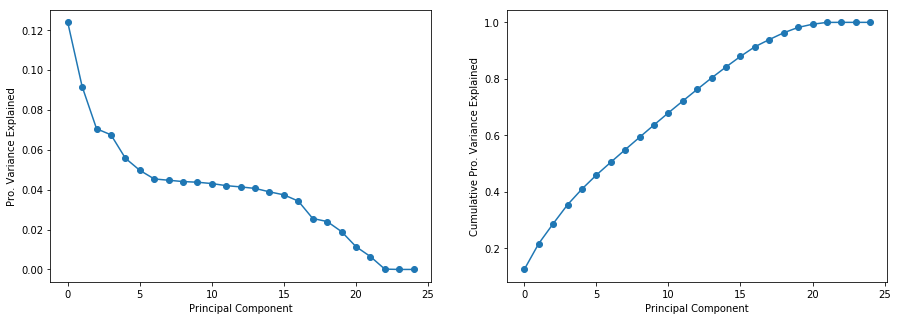

In [46]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import pylab
import pandas as pd
from sklearn.decomposition import PCA
import datetime

%matplotlib inline

from sklearn.preprocessing import StandardScaler

train = pd.read_csv('100k_train.csv')
train = train.drop(['orig_destination_distance', 'hotel_cluster'], axis=1)
train['date_time'] = pd.to_datetime(train['date_time'])
train['date_time'] = train['date_time'].view('int64')

train['srch_ci'] = pd.to_datetime(train['srch_ci'])
train['srch_ci'] = train['srch_ci'].view('int64')

train['srch_co'] = pd.to_datetime(train['srch_co'])
train['srch_co'] = train['srch_co'].view('int64')

print(train.head())
stdScaler = StandardScaler()
train = stdScaler.fit_transform(train)
print(train.view())

pca = PCA()
pca.fit(train)

plt.subplots(2,1, figsize=(15,5))
ax1 = plt.subplot(1,2,1)
plt.plot(pca.explained_variance_ratio_, '-o')
plt.xlabel("Principal Component")
plt.ylabel("Pro. Variance Explained")
ax1 = plt.subplot(1,2,2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Pro. Variance Explained")